**Imports**

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

**PROJECTO - PARTE 1.3**

Classe do modelo

In [2]:
# classe RedeNeuronal
class RedeNeuronal:
    def __init__(self, taxa_aprendizagem=0.1, momento=0.0, ordem_apresentacao="fixa"):
        # iniciar a taxa de aprendizagem, momento e ordem de apresentação conforme os fornecidos na configuração do modelo
        self.taxa_aprendizagem = taxa_aprendizagem
        self.momento = momento
        self.ordem_apresentacao = ordem_apresentacao

        # criar o modelo
        self.model = self.criar_modelo() 
        self.hist_treino = None # var para mostrar graficamente a evolução do modelo

    # função para criar o modelo
    def criar_modelo(self):
        # tipo do modelo
        model = Sequential()
        # adicionar as camadas do modelo e o modo de ativação dos neurônios
        model.add(Dense(units=2, activation='sigmoid', input_dim=2)) # input_dim = número de entradas na rede
        model.add(Dense(units=1, activation='sigmoid'))
        
        # otimizador da rede através da taxa de aprendizagem e da var de momento adicionadas
        optimizer = SGD(learning_rate=self.taxa_aprendizagem, momentum=self.momento)
        # compilar o modelo com o cálculo do loss utilizado o MSE e o otimizador definido anteriormente
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

    # função para treinar a rede em 2000 iterações
    def treinar(self, X, y, epochs=2000):
        # se a ordem de apresentação dos dados for aleatória
        if self.ordem_apresentacao == "aleatoria":
            # fazer shuffle dos dados e das labels correspondentes
            X, y = shuffle(X, y)
        
        # introduzir os dados e as respetivas labels na rede de forma a treinar a rede
        hist_treino = self.model.fit(X, y, epochs=epochs, verbose=0)
        # guardar os dados da evolução do treino
        self.hist_treino = hist_treino.history

    # função para prever a label respetiva à input conforme o modelo treinado
    def prever(self, X):
        return self.model.predict(X)

Função da curva de aprendisagem

In [3]:
# função para mostrar a curva de aprendizagem do modelo
def plot_curva_aprendizagem(hists_treino, titulos):
    plt.figure()
    for i, hist_treino in enumerate(hists_treino):
        plt.plot(hist_treino['loss'], label=titulos[i])
        erro_final = hist_treino['loss'][-1]  # Obtém o último valor do erro no histórico
        print(f"Erro final para {titulos[i]}: {erro_final}")
    plt.title("Curva de Aprendizagem")
    plt.xlabel('Época')
    plt.ylabel('Erro')
    plt.legend()
    plt.show()

Main


Configuração 1: Taxa de Aprendizagem=0.1, Momento=0.1, Ordem de Apresentação=fixa

1/1 [==============================] - 0s 77ms/step
Previsões: [0.50759006 0.5102648  0.48980787 0.49251541]
Configuração 2: Taxa de Aprendizagem=0.1, Momento=0.9, Ordem de Apresentação=fixa
1/1 [==============================] - 0s 49ms/step
Previsões: [0.04532565 0.94620097 0.94622815 0.05327601]
Configuração 3: Taxa de Aprendizagem=0.5, Momento=0.1, Ordem de Apresentação=fixa
1/1 [==============================] - 0s 43ms/step
Previsões: [0.12461886 0.86868614 0.86859465 0.15237416]
Configuração 4: Taxa de Aprendizagem=0.5, Momento=0.9, Ordem de Apresentação=fixa
1/1 [==============================] - 0s 47ms/step
Previsões: [0.02534336 0.9777665  0.977776   0.02663533]
Configuração 5: Taxa de Aprendizagem=0.1, Momento=0.1, Ordem de Apresentação=aleatoria
1/1 [==============================] - 0s 59ms/step
Previsões: [0.43993327 0.55862975 0.47798452 0.53607833]
Configuração 6: Taxa de Aprendizagem=0

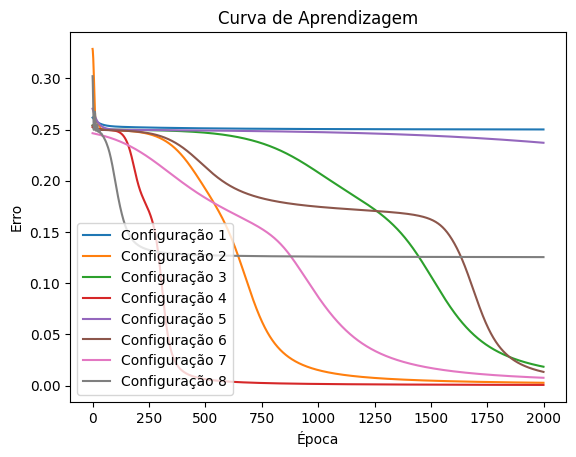

In [4]:
# inputs da rede
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# labels correspondentes a cada input
y = np.array([0, 1, 1, 0])

# diferentes configurações da rede de forma a encontrar os parâmetros que obtêm um melhor desempenho 
configs = [
    {"taxa_aprendizagem": 0.1, "momento": 0.1, "ordem_apresentacao": "fixa"},
    {"taxa_aprendizagem": 0.1, "momento": 0.9, "ordem_apresentacao": "fixa"},
    {"taxa_aprendizagem": 0.5, "momento": 0.1, "ordem_apresentacao": "fixa"},
    {"taxa_aprendizagem": 0.5, "momento": 0.9, "ordem_apresentacao": "fixa"},
    {"taxa_aprendizagem": 0.1, "momento": 0.1, "ordem_apresentacao": "aleatoria"},
    {"taxa_aprendizagem": 0.1, "momento": 0.9, "ordem_apresentacao": "aleatoria"},
    {"taxa_aprendizagem": 0.5, "momento": 0.1, "ordem_apresentacao": "aleatoria"},
    {"taxa_aprendizagem": 0.5, "momento": 0.9, "ordem_apresentacao": "aleatoria"}
]

hists_treino = []
titulos = []

# treinar um modelo para cada configuração, prever os resultados com base no modelo treinado e mostrar a curva de aprendizagem do modelo
for i, config in enumerate(configs):
    # definir a rede e as suas configurações
    rede = RedeNeuronal(**config)
    print(f"Configuração {i+1}: Taxa de Aprendizagem={config['taxa_aprendizagem']}, Momento={config['momento']}, Ordem de Apresentação={config['ordem_apresentacao']}")
    # treinar a rede
    rede.treinar(X, y)
    # prever as labels utilizando o modelo treinado
    previsoes = rede.prever(X)
    print(f"Previsões: {previsoes.flatten()}")
        
    hists_treino.append(rede.hist_treino)
    titulos.append(f"Configuração {i+1}")

# plot da curva de aprendizagem
plot_curva_aprendizagem(hists_treino, titulos)

**PROJECTO - PARTE 1.4**

Classe do modelo

taxa de aprendizagem = 0.1 e momento = 0.9 pois foram os melhores resultados do modelo anterior

In [5]:
class RedeNeuronal:
    def __init__(self):
        # tipo de modelo
        self.model = Sequential()

        # iniciar a taxa de aprendizagem e momento 
        self.taxa_aprendizagem = 0.1
        self.momento = 0.9

        # defenir a dimensao da camada de entrada com 16 neurônios (4x4) e ativação 'relu'
        self.model.add(Dense(16, input_dim=16, activation='relu'))

        # adicionar uma camada de saída com 1 neurônio e ativação 'sigmoid' pois trata-se de um problema de classificação binária
        self.model.add(Dense(1, activation='sigmoid'))

        # otimizador da rede atraves da taxa de aprendizagem e da var de momento adicionadas
        optimizer = SGD(learning_rate=self.taxa_aprendizagem, momentum=self.momento)
        # compilar o modelo
        self.model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

    def treinar(self, dados, lables, epochs=1000):
        # variáveis para armazenar a evolução da precisão e da perda
        historico = self.model.fit(dados, lables, epochs=epochs, verbose=0)
        self.accuracy_history = historico.history['accuracy']
        self.loss_history = historico.history['loss']

    def prever(self, dado):
        # efetuar uma previsao com o modelo treinado
        resultado = self.model.predict(np.array([dado]))
        return resultado

Dados de entrada na rede

In [6]:
# padrão A
A = np.array([1, 1, 1, 1,
              1, -1, -1, 1,
              1, -1, -1, 1,
              1, 1, 1, 1])

# padrão B
B = np.array([1, -1, -1, 1,
              -1, 1, 1, -1,
              -1, 1, 1, -1,
              1, -1, -1, 1])

# labels respetivas
y = np.array([0, 1])

Criar e treinar a rede

In [7]:
# iniciar a rede
rede = RedeNeuronal()

# treinar o modelo com os padrões A e B e fornecendo as respetivas lables
rede.treinar(np.array([A, B]), y)

Gráfico de evolução de aprendisagem da rede

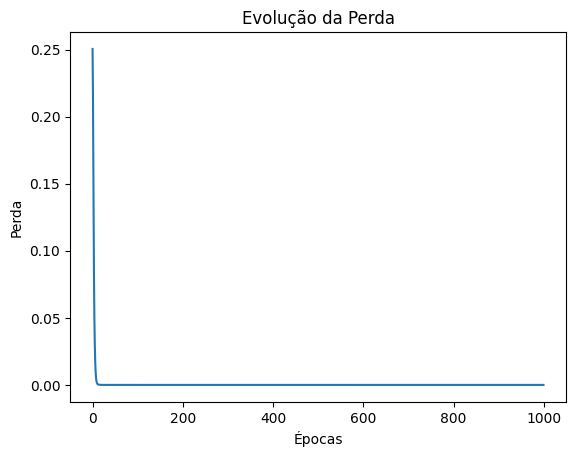

2.8885744995932328e-06


In [11]:
# mostrar a curva de aprendisagem do modelo atraves da evolução do loss
plt.figure()
plt.plot(rede.loss_history)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

print(rede.loss_history[999])

Previsões do modelo com base no treino

In [9]:
# utilizar a rede para prever a label do padrão A
previsaoA = rede.prever(A)
print("Resultado para o padrão A:", previsaoA)

# utilizar a rede para prever a label do padrão B
previsaoB = rede.prever(B)
print("Resultado para B:", previsaoB)

1/1 [==============================] - 0s 79ms/step
Resultado para o padrão A: [[0.00235129]]
1/1 [==============================] - 0s 22ms/step
Resultado para B: [[0.99950546]]


O resultado das previsões foram bastante possitivos o que demostra que o modelo aprendeu bastante bem a identificar os padroes